In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Specify the path to your .xlsx file
file_path = "C://Users//LENOVO//Downloads//STATIN_DATA\wildfire_weather_data.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Display the DataFrame
print(df)

      Region  Estimated_fire_area  Temperature_Mean  WindSpeed_Mean
0        NSW             8.680000         23.055527        4.841764
1        NSW            16.611250         22.425765        4.014080
2        NSW             5.520000         20.621405        4.477879
3        NSW             6.264000         19.632722        4.017578
4        NSW             5.400000         21.477315        3.884550
...      ...                  ...               ...             ...
26401     WA            32.970000         27.784354        4.268756
26402     WA            20.840625         27.351996        4.365700
26403     WA           136.083077         26.532585        4.496722
26404     WA            42.397895         26.231115        4.211237
26405     WA           107.370851         28.090392        4.373947

[26406 rows x 4 columns]


In [3]:
df.isna().sum()

Region                  0
Estimated_fire_area     0
Temperature_Mean        9
WindSpeed_Mean         16
dtype: int64

In [4]:
df.Temperature_Mean = df.Temperature_Mean.interpolate(method='linear')
df.WindSpeed_Mean = df.WindSpeed_Mean.interpolate(method='linear')

In [5]:
df.isna().sum()

Region                 0
Estimated_fire_area    0
Temperature_Mean       0
WindSpeed_Mean         0
dtype: int64

In [6]:
df

,Region,Estimated_fire_area,Temperature_Mean,WindSpeed_Mean
0,NSW,8.680000,23.055527,4.841764
1,NSW,16.611250,22.425765,4.014080
2,NSW,5.520000,20.621405,4.477879
3,NSW,6.264000,19.632722,4.017578
4,NSW,5.400000,21.477315,3.884550
...,...,...,...,...
26401,WA,32.970000,27.784354,4.268756
26402,WA,20.840625,27.351996,4.365700
26403,WA,136.083077,26.532585,4.496722
26404,WA,42.397895,26.231115,4.211237


In [7]:
csv_file_path = "C://Users//LENOVO//Downloads//STATIN_DATA//wildfire_weather_data.csv"
df.to_csv(csv_file_path, index=False)

In [8]:
def slovins_formula(population_size, error_margin):
    return math.ceil(population_size / (1 + population_size * (error_margin ** 2)))

# Proportional Stratified Random Sampling
def proportional_stratified_sampling(data, strata_column, sample_size):
    strata_sizes = data[strata_column].value_counts()
    proportional_sizes = (strata_sizes / len(data) * sample_size).astype(int)
    
    samples = []
    for stratum, size in proportional_sizes.items():
        stratum_sample = data[data[strata_column] == stratum].sample(size)
        samples.append(stratum_sample)
    
    return pd.concat(samples, axis=0)

In [11]:
population_size = len(df)
error_margin = 0.05  # e.g., 5% error margin
sample_size = slovins_formula(population_size, error_margin)
print(f"Sample size using Slovin's formula: {sample_size}")

Sample size using Slovin's formula: 395


In [13]:
sample_df = proportional_stratified_sampling(df, 'Region', sample_size)
sample_df

,Region,Estimated_fire_area,Temperature_Mean,WindSpeed_Mean
25119,WA,639.982000,23.390953,3.551176
21379,WA,593.569167,23.552620,4.091700
21667,WA,37.345455,14.617797,4.637551
21409,WA,544.986486,25.227217,4.334514
25268,WA,35.823600,19.427573,4.840414
...,...,...,...,...
17246,TA,29.795000,8.267706,1.748738
17970,TA,35.423571,19.759433,3.482381
18299,TA,14.536667,10.675490,2.851847
18137,TA,1.000000,9.040038,3.716907


In [19]:
df.Region.unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [21]:
df.Region.value_counts()

WA     5627
QL     5533
NT     5053
NSW    4623
VI     2176
SA     1990
TA     1404
Name: Region, dtype: int64

In [22]:
sample_df.Region.unique()

array(['WA', 'QL', 'NT', 'NSW', 'VI', 'SA', 'TA'], dtype=object)

In [23]:
sample_df.Region.value_counts()

WA     84
QL     82
NT     75
NSW    69
VI     32
SA     29
TA     21
Name: Region, dtype: int64

In [24]:
csv_file_path = "C://Users//LENOVO//Downloads//STATIN_DATA//sample_wildfire_weather_data.csv"
sample_df.to_csv(csv_file_path, index=False)

In [2]:

# Specify the path to your .xlsx file
file_path = "C://Users//LENOVO//Downloads//STATIN_DATA//sample_wildfire_weather_data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

    Region  Estimated_fire_area  Temperature_Mean  WindSpeed_Mean
0       WA           639.982000         23.390953        3.551176
1       WA           593.569167         23.552620        4.091700
2       WA            37.345455         14.617797        4.637551
3       WA           544.986486         25.227217        4.334514
4       WA            35.823600         19.427573        4.840414
..     ...                  ...               ...             ...
387     TA            29.795000          8.267706        1.748738
388     TA            35.423571         19.759433        3.482381
389     TA            14.536667         10.675490        2.851847
390     TA             1.000000          9.040038        3.716907
391     TA             2.200000         17.762332        2.908519

[392 rows x 4 columns]


In [6]:
df.describe()

,Estimated_fire_area,Temperature_Mean,WindSpeed_Mean
count,392.000000,392.000000,392.000000
mean,140.235901,21.597365,3.734186
std,301.383276,6.391048,0.929961
min,1.000000,3.904376,1.698793
25%,8.979375,16.829590,3.074841
50%,35.278286,22.465655,3.657904
75%,145.609566,26.756735,4.241295
max,3810.988436,34.162685,7.192822


In [8]:
data = df.Estimated_fire_area
n = len(data)  # jumlah data
mean_value = sum(data) / n  # mean dari data
y = (sum([(x - mean_value) ** 2 for x in data]))
# Menghitung standar deviasi
std = (y / (n-1)) ** 0.5
parameter = {'n':n,'mean':mean_value,'y':y}
for label,value in parameter.items():
     print(f"{label} = {value}")
print(f"Hasil Standar Deviasi Sample : {std}")

n = 392
mean = 140.2359005506454
y = 35515264.76568263
Hasil Standar Deviasi Sample : 301.3832762382798


In [9]:
data = df.Temperature_Mean
n = len(data)  # jumlah data
mean_value = sum(data) / n  # mean dari data
y = (sum([(x - mean_value) ** 2 for x in data]))
# Menghitung standar deviasi
std = (y / (n-1)) ** 0.5
parameter = {'n':n,'mean':mean_value,'y':y}
for label,value in parameter.items():
     print(f"{label} = {value}")
print(f"Hasil Standar Deviasi Sample : {std}")

n = 392
mean = 21.597364596713053
y = 15970.588649634497
Hasil Standar Deviasi Sample : 6.391048057056636


In [12]:
data = df.WindSpeed_Mean
n = len(data)  # jumlah data
mean_value = sum(data) / n  # mean dari data
y = (sum([(x - mean_value) ** 2 for x in data]))
# Menghitung standar deviasi
std = (y / (n-1)) ** 0.5
parameter = {'n':n,'mean':mean_value,'y':y}
for label,value in parameter.items():
     print(f"{label} = {value}")
print(f"Hasil Standar Deviasi Sample : {std}")

n = 392
mean = 3.7341863204231585
y = 338.14749031213967
Hasil Standar Deviasi Sample : 0.9299609351751092


In [15]:
# Extracting the data
data = df["Estimated_fire_area"]

# Calculating Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
min_value = data.min()
max_value = data.max()
# Calculating IQR
IQR = Q3 - Q1

# Calculating Lower and Upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
parameter = {'min':min_value,'max':max_value,'Q1':Q1,'Q3':Q3,'IQR':IQR,'lower bound':lower_bound,'upper bound':upper_bound}
for label,value in parameter.items():
     print(f"{label} = {value}")
# Identifying outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Jumlah outliers pada sample : {len(outliers)}")

min = 1.0
max = 3810.988436
Q1 = 8.979375000000001
Q3 = 145.6095663
IQR = 136.6301913
lower bound = -195.96591195000002
upper bound = 350.55485325000006
Jumlah outliers pada sample : 46


In [17]:
# Extracting the data
data = df["Temperature_Mean"]

# Calculating Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
min_value = data.min()
max_value = data.max()
# Calculating IQR
IQR = Q3 - Q1

# Calculating Lower and Upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
parameter = {'min':min_value,'max':max_value,'Q1':Q1,'Q3':Q3,'IQR':IQR,'lower bound':lower_bound,'upper bound':upper_bound}
for label,value in parameter.items():
     print(f"{label} = {value}")
# Identifying outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Jumlah outliers pada sample : {len(outliers)}")

min = 3.904376228089137
max = 34.16268481865421
Q1 = 16.829590307720288
Q3 = 26.756734832684284
IQR = 9.927144524963996
lower bound = 1.938873520274294
upper bound = 41.647451620130276
Jumlah outliers pada sample : 0


In [18]:
# Extracting the data
data = df["WindSpeed_Mean"]

# Calculating Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
min_value = data.min()
max_value = data.max()
# Calculating IQR
IQR = Q3 - Q1

# Calculating Lower and Upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
parameter = {'min':min_value,'max':max_value,'Q1':Q1,'Q3':Q3,'IQR':IQR,'lower bound':lower_bound,'upper bound':upper_bound}
for label,value in parameter.items():
     print(f"{label} = {value}")
# Identifying outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Jumlah outliers pada sample : {len(outliers)}")

min = 1.698792947712286
max = 7.192822491548517
Q1 = 3.0748410871522283
Q3 = 4.241294962999098
IQR = 1.1664538758468699
lower bound = 1.3251602733819234
upper bound = 5.990975776769403
Jumlah outliers pada sample : 10


In [4]:
df.columns

Index(['Region', 'Estimated_fire_area', 'Temperature_Mean', 'WindSpeed_Mean'], dtype='object')

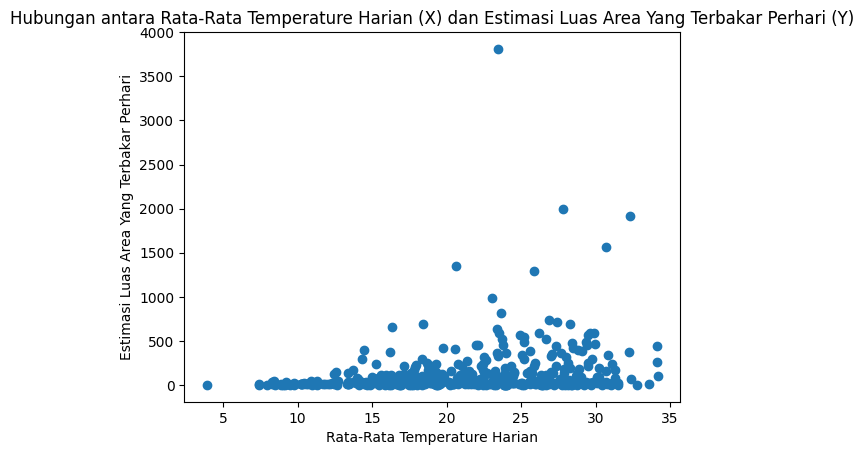

In [7]:
plt.scatter(df.Temperature_Mean, df.Estimated_fire_area)
plt.title('Hubungan antara Rata-Rata Temperature Harian (X) dan Estimasi Luas Area Yang Terbakar Perhari (Y)')
plt.xlabel('Rata-Rata Temperature Harian')
plt.ylabel('Estimasi Luas Area Yang Terbakar Perhari')
plt.show()

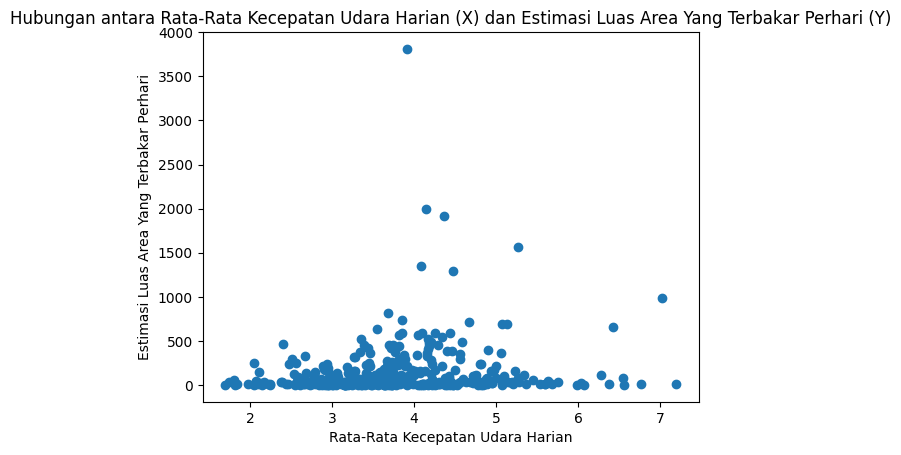

In [8]:
plt.scatter(df.WindSpeed_Mean, df.Estimated_fire_area)
plt.title('Hubungan antara Rata-Rata Kecepatan Udara Harian (X) dan Estimasi Luas Area Yang Terbakar Perhari (Y)')
plt.xlabel('Rata-Rata Kecepatan Udara Harian')
plt.ylabel('Estimasi Luas Area Yang Terbakar Perhari')
plt.show()

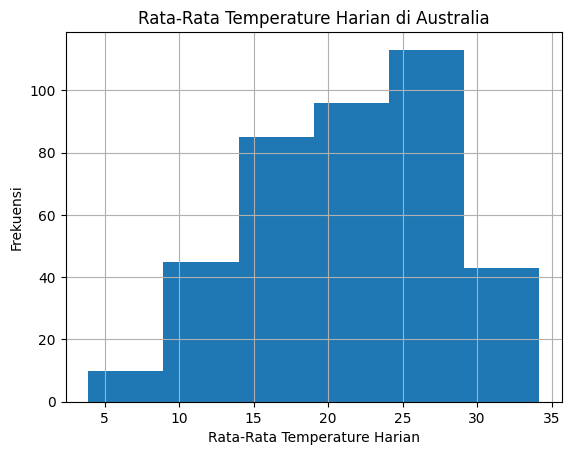

In [10]:
df.hist(column="Temperature_Mean", bins=6)
plt.xlabel("Rata-Rata Temperature Harian")
plt.ylabel("Frekuensi")
plt.title("Rata-Rata Temperature Harian di Australia")

plt.show()

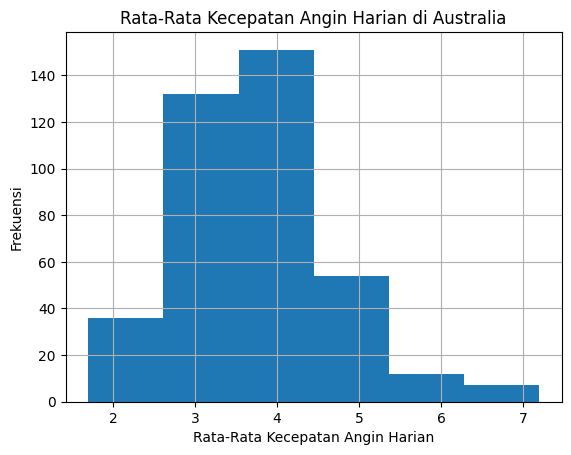

In [11]:
df.hist(column="WindSpeed_Mean", bins=6)
plt.xlabel("Rata-Rata Kecepatan Angin Harian")
plt.ylabel("Frekuensi")
plt.title("Rata-Rata Kecepatan Angin Harian di Australia")

plt.show()

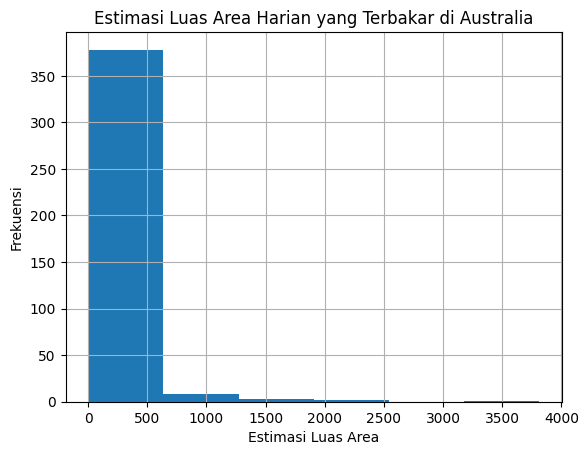

In [15]:
df.hist(column="Estimated_fire_area", bins=6)
plt.xlabel("Estimasi Luas Area")
plt.ylabel("Frekuensi")
plt.title("Estimasi Luas Area Harian yang Terbakar di Australia")

plt.show()

Text(0.5, 1.0, 'Boxplot untuk Rata-Rata Temperature Harian')

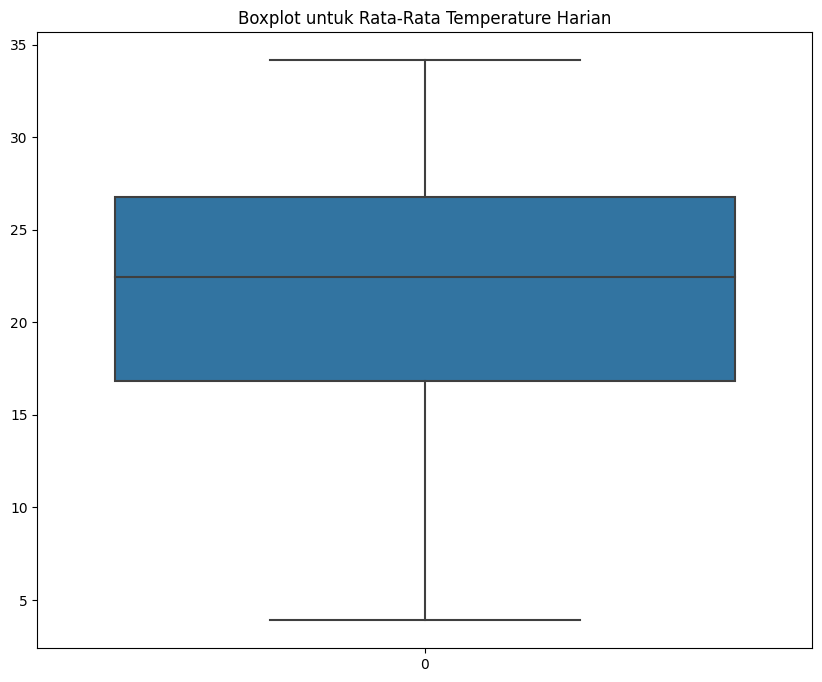

In [3]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.Temperature_Mean)
plt.title("Boxplot untuk Rata-Rata Temperature Harian")

Text(0.5, 1.0, 'Boxplot untuk Rata-Rata Kecepatan Angin Harian')

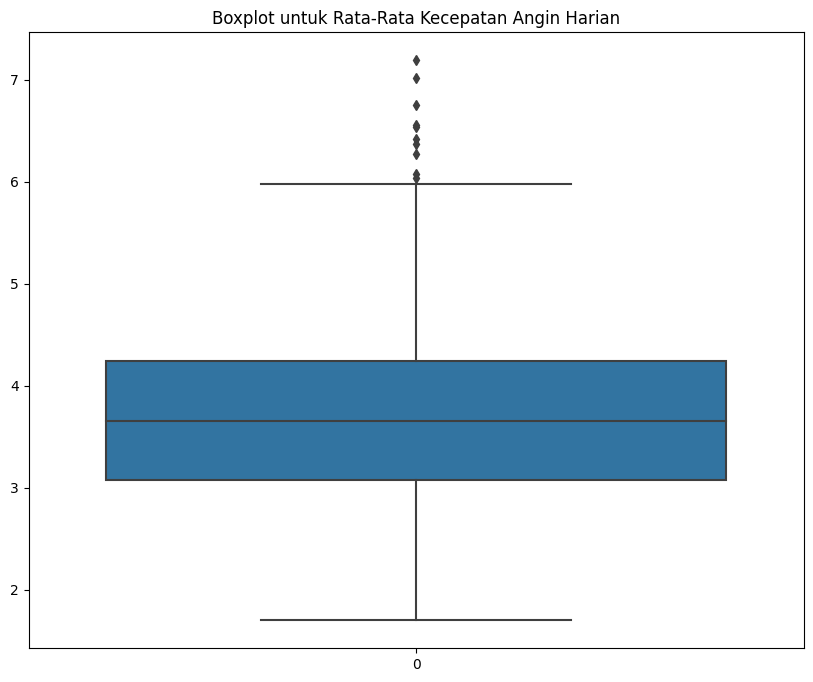

In [4]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.WindSpeed_Mean)
plt.title("Boxplot untuk Rata-Rata Kecepatan Angin Harian")

Text(0.5, 1.0, 'Boxplot untuk Estimasi Luas Area Harian yang Terbakar')

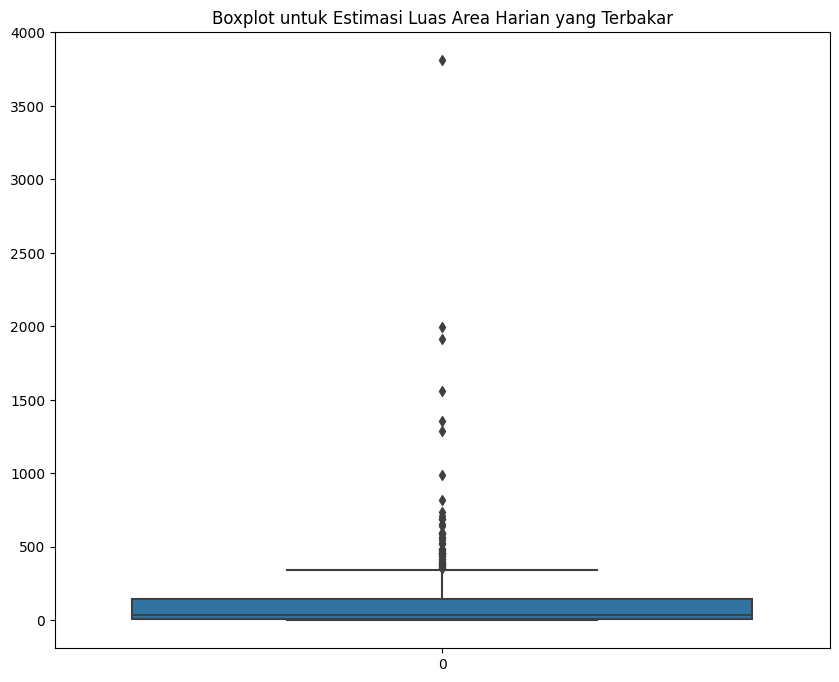

In [6]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.Estimated_fire_area)
plt.title("Boxplot untuk Estimasi Luas Area Harian yang Terbakar")